# ImmuneBoosters Inc. 
## Group 4 - Final Project

# Table of Contents
1. Introduction
2. Data Downloading, cleaning and storing in an excel file
3. Data Visualization and Interpretation
4. Project Summary
5. Lessons Learnt

# 1. Introduction
Our project develops a platform called Immuneboosters which automates the process of obtaining Medicaid Spending data, data on social determinants of health and immunization rates in the United States. Once the data is obtained, the platform combines these different data sources to form a comprehensive dataset. This final dataset is used to perform exploratory data analysis (EDA) and validatory correlation tests to understand the effect of various factors on immunization rates in the United States.
Our Jupyter notebook will walk you through the process in a step-by-step manner.

# 2. Data Downloading, cleaning and storing in an excel file
__NOTE: Code requires chromedriver.exe to be installed in the working directory and requires selenium to be installed in anaconda__

This step automates the process of pulling data from various internet sources. In our project, we will be looking at the effect of social determinants like Religious Exemptions, Philosophical Exemptions, Education, as well as Medicaid Spending data on immunization rates across different states within the U.S.A.
Our data was pulled using three different data sources: Web Scrapped data, Web API pulled data and Web downloaded excel sheet.

## 2.1.a Download Raw Medicaid Spending Data

Medicaid Spending data has been downloaded (using selenium) from https://www.macpac.gov/publication/medicaid-spending-by-state-category-and-source-of-funds/. The raw data is the file that gets downloaded from the website.

In [9]:
from selenium import webdriver
import time
import os

path_medicare = os.path.abspath('.')

chromeOptions = webdriver.ChromeOptions()
prefs = {"download.default_directory" : path_medicare}
chromeOptions.add_experimental_option("prefs",prefs)

medicare_driver = webdriver.Chrome(executable_path=r"chromedriver.exe", options=chromeOptions)
medicare_driver.maximize_window()
open_url=medicare_driver.get("https://www.macpac.gov/publication/medicaid-spending-by-state-category-and-source-of-funds/")
elem_file=medicare_driver.find_element_by_css_selector('#main > div > header > a:nth-of-type(1)')

elem_file.click()
time.sleep(3)
medicare_driver.quit()

## 2.1.b Clean Medicaid Data
The clean data is the subset of columns that we need for our project analysis. 
A few states have been removed due to the error encountered while scraping their vaccination rates data (see description of Vaccination Data section below). This subsetted clean data is stored in the form on an Excel workbook on the user's PC.

In [10]:
from openpyxl import load_workbook
from openpyxl.styles import Alignment
from openpyxl.styles import Font

medicaid_data = load_workbook('EXHIBIT-16.-Medicaid-Spending-by-State-Category-and-Source-of-Funds-FY-2016-millions.xlsx')
raw_sheet = medicaid_data['EX16- McaidSpend']
#Re-name sheet and label it as raw data
raw_sheet.title = 'medicaid_raw'

#Create a new sheet for the clean data and insert table titles
clean_sheet = medicaid_data.create_sheet("medicaid_clean")
clean_sheet['A1']='State'
clean_sheet['B1']='State Medicare Funding FY 2016'

states_to_copy=['Massachusetts', 'Missouri', 'Kansas', 'Rhode Island', 'South Dakota', 'Georgia', 'New Jersey', 'Mississippi', 'Oklahoma', 'Nebraska', 'Virginia', 'North Carolina', 'Indiana', 'Maine', 'Utah', 'Wisconsin', 'Montana', 'Arkansas', 'Vermont', 'Delaware', 'New Mexico', 'Idaho', 'Illinois', 'Nevada', 'Pennsylvania', 'Oregon', 'South Carolina', 'Alaska', 'Alabama', 'Kentucky', 'Arizona', 'New Hampshire', 'Iowa', 'New York', 'Tennessee', 'Texas', 'West Virginia', 'California', 'Wyoming', 'North Dakota', 'Maryland', 'Colorado']

#Copy the state name and the medicaid funding to the appropriate columns in the clean sheet
state_count=2
for row in raw_sheet['A5:L55']:
    for cell in row:
        if cell.value in states_to_copy:
            clean_sheet['A{}'.format(state_count)]=cell.value
            clean_sheet['B{}'.format(state_count)]=raw_sheet['L{}'.format(cell.row)].value
            state_count+=1
            
#Inserting a cover sheet
cover_sheet=medicaid_data.create_sheet("cover sheet", 0)
cover_sheet['A1']='Group 4:'
cover_sheet['A1'].font = Font(bold=True)
cover_sheet['B1']='Ayushi Dwivedi, Aarti Pandit'
cover_sheet['A3']='Data Description:'
cover_sheet['A3'].font = Font(bold=True)
cover_sheet.merge_cells('A4:M7')
cover_sheet['A4'].alignment = Alignment(wrapText=True)
cover_sheet['A4']='Medicaid Spending data: has been downloaded (using selenium) from https://www.macpac.gov/publication/medicaid-spending-by-state-category-and-source-of-funds/. The raw data is the file that gets downloaded from the website. The clean data is the subset of columns that we need for our project analysis. A few states have been removed due to the error encountered while scraping their vaccination rates data (see description of Vaccination Data section below).'
cover_sheet.merge_cells('A9:M18')
cover_sheet['A9'].alignment = Alignment(wrapText=True)
cover_sheet['A9']='Vaccination data: vaccination rates data has been web scraped from https://www.aap.org/en-us/advocacy-and-policy/aap-health-initiatives/immunizations/Pages/Across-America.aspx. The clean data is obtained by writing a python code that opens the website, clicks on a state, obtains the source code, scrapes the value under the heading “Combined 7-vaccine series in children 19-35 months old (Includes ≥4 DTaP doses, ≥3 Polio doses, ≥1 MMR dose, Hib full series, ≥3 HepB doses, ≥1 Varicella dose, and ≥4 PCV doses)”, "Religious exemptions allowed?", "Philosophical exemptions allowed?", then clicks the "close button" to close out the pop up, clicks on the next state and so on. This gives the % of children in that state who have received all 7-vaccines. The code also scrapes data about if religious and philosophical exemptions are allowed in the state. The raw data is the html parser obtained by clicking on Alaska. The desired value is in: (p) class="bar-value">68.8%(/p) since 68.8% of children in Alaska were vaccinated for all 7 doses. A few states are not included in the file since those states have other clickable items(Eg: exclamation points) on the website. Due to this the program is not able to click on those states and retrieve the appropriate data.'
cover_sheet.merge_cells('A20:M26')
cover_sheet['A20'].alignment = Alignment(wrapText=True)
cover_sheet['A20']='Education data: We are pulling the Public School Enrollment in 2013-14 data from the Civil Rights Data Collection (CRDC) using the CRDC API : https://api.ed.gov/data/crdc_enrollment_2013-14?per_page=100&api_key=FYOEBgpdzH5lF3mnd3Zpgho5IXUF1RhA05iBIoRR. This dataset gives information about the number of students enrolled in public education in 2013-14 by race/ethnicity, gender and program status. Since we are looking at different factors having an effect on immunization rates per state, one of the factors we decided to look at was the school enrollment per state data which can be a good estimator of the importance of education in a state. Thus, we are pulling the total number of public school enrollments per state using the CRDC API to include in our analysis. APIs for later years weren’t available so we decided to use the 2013-14 data as a good estimate of the total public school enrollments.'

medicaid_data.save('group_04_data.xlsx')

## 2.2.a Download Raw Vaccination Data 

Vaccination rates data has been web scraped from https://www.aap.org/en-us/advocacy-and-policy/aap-health-initiatives/immunizations/Pages/Across-America.aspx. The clean data is obtained by writing a python code that opens the website, clicks on a state, obtains the source code, scrapes the value under the heading “Combined 7-vaccine series in children 19-35 months old (Includes ≥4 DTaP doses, ≥3 Polio doses, ≥1 MMR dose, Hib full series, ≥3 HepB doses, ≥1 Varicella dose, and ≥4 PCV doses)”, "Religious exemptions allowed?", "Philosophical exemptions allowed?", then clicks the "close button" to close out the pop up, clicks on the next state and so on.
This gives the % of children in that state who have received all 7-vaccines. The code also scrapes data about if religious and philosophical exemptions are allowed in the state.
The raw data is a sample html parser obtained by clicking on Alaska. The desired value is in: 
(p) class="bar-value">68.8%(/p) since 68.8% of children in Alaska were vaccinated for all 7 doses. A few states are not included in the file since those states have other clickable items(Eg: exclamation points) on the website. Due to this the program is not able to click on those states and retrieve the appropriate data.
This clean vaccination data gets stored in the same Excel workbook created earlier. 

In [11]:
import bs4
import pandas as pd

#Open a web browser
vacci_driver = webdriver.Chrome(executable_path=r"chromedriver.exe")
vacci_driver.maximize_window()
#Open the url
open_url=vacci_driver.get("https://www.aap.org/en-us/advocacy-and-policy/aap-health-initiatives/immunizations/Pages/Across-America.aspx")
#Click on 'Alaska', obtain the source code and close browser
elem_alaska=vacci_driver.find_element_by_css_selector('#svg-us > g.states-group > path[data-name="Alaska"]')
elem_alaska.click()
alaska_html=vacci_driver.page_source
vacci_driver.quit()
#Put the source code in the beautiful and prettify it
alaska_soup=bs4.BeautifulSoup(alaska_html, "html.parser")
alaska_soup_pretty=alaska_soup.prettify()

#Create a dataframe with the html parser and state name
df_vacci_raw=pd.DataFrame(columns=['Sample State', 'Sample raw html parser'])
df_vacci_raw=df_vacci_raw.append({'Sample State': 'Alaska', 'Sample raw html parser': str(alaska_soup_pretty)}, ignore_index=True)

#Write the dataframe to excel file
current_book = load_workbook('group_04_data.xlsx')
vacci_writer=pd.ExcelWriter('group_04_data.xlsx', engine='openpyxl')
vacci_writer.book=current_book
df_vacci_raw.to_excel(vacci_writer, 'vaccination_raw', index=False)

vacci_writer.save()

## 2.2.b Clean Vaccination Data

In [12]:
#Get a list of all the states for which the website has vaccination data
states_driver = webdriver.Chrome(executable_path=r"chromedriver.exe")
states_driver.get("https://www.aap.org/en-us/advocacy-and-policy/aap-health-initiatives/immunizations/Pages/Across-America.aspx")

html_for_states=states_driver.page_source

states_driver.quit()
state_soup=bs4.BeautifulSoup(html_for_states, "html.parser")
states=state_soup.select('#svg-us > g.states-group > path')

states_list=[]
for i in range(len(states)-1):
    new_state=states[i].get('data-name')
    states_list.append(new_state)

#Eliminate States that are throwing errors
states_not_working=['Connecticut', 'District of Columbia', 'Florida', 'Hawaii', 'Louisiana', 'Michigan', 'Minnesota', 'Ohio', 'Washington']
states_to_scrape=list(set(states_list) - set(states_not_working))


#Create an empty dataframe that will store scraped data
df_vacci_clean=pd.DataFrame(columns=['State','%Children with combined 7-vaccine series','Religious Exemption allowed?', 'Philosophical Exemption allowed?'])


#Open a browser, click on every state, obtain the source code, pull the % of children vaccinated/exemptions allowed, click on the close button, click on the next state and repeat
vacci_clean_driver = webdriver.Chrome(executable_path=r"chromedriver.exe")
vacci_clean_driver.maximize_window()
vacci_clean_driver.get("https://www.aap.org/en-us/advocacy-and-policy/aap-health-initiatives/immunizations/Pages/Across-America.aspx")

for statename in states_to_scrape:
    str1 = "#svg-us > g.states-group > path[data-name=\""+statename +"\"]"
    to_click = vacci_clean_driver.find_element_by_css_selector(str1)
    to_click.click()
    data_html=vacci_clean_driver.page_source
    to_close=vacci_clean_driver.find_element_by_css_selector('#vaccination-ig > div.close-btn > img')
    to_close.click()

    data_soup=bs4.BeautifulSoup(data_html, "html.parser")
    statistic_data_point=data_soup.select('#states-national-ig > div.chart-wrap > div:nth-of-type(3) > div:nth-of-type(2) > div.bar-chart.state-bar > p')
    statistic=statistic_data_point[0].getText()

    religious_data_point = data_soup.select('#vaccination-ig > div.exemptions-section > div:nth-of-type(2) > p.circle')
    religious_stat=religious_data_point[0].getText()

    philosophical_data_point = data_soup.select('#vaccination-ig > div.exemptions-section > div:nth-of-type(3) > p.circle')
    philosophical_stat=philosophical_data_point[0].getText()
#Store data points in the 'df_vacci_clean' dataframe 
    df_vacci_clean = df_vacci_clean.append({'State': statename, '%Children with combined 7-vaccine series': statistic, 'Religious Exemption allowed?': religious_stat, 'Philosophical Exemption allowed?': philosophical_stat},ignore_index=True)

vacci_clean_driver.quit()

#Write dataframe to excel
current_book = load_workbook('group_04_data.xlsx')
vacci_clean_writer=pd.ExcelWriter('group_04_data.xlsx', engine='openpyxl')
vacci_clean_writer.book=current_book
df_vacci_clean.to_excel(vacci_clean_writer, 'vaccination_clean', index=False)

vacci_clean_writer.save()



## 2.3 Download Education Data

We are pulling the Public School Enrollment in 2013-14 data from the Civil Rights Data Collection (CRDC) using the CRDC API : https://api.ed.gov/data/crdc_enrollment_2013-14?per_page=100&api_key=FYOEBgpdzH5lF3mnd3Zpgho5IXUF1RhA05iBIoRR. 
This dataset gives information about the number of students enrolled in public education in 2013-14 by race/ethnicity, gender and program status. 
Since we are looking at different factors having an effect on immunization rates per state, one of the factors we decided to look at was the school enrollment per state data which can be a good estimator of the importance of education in a state. Thus, we are pulling the total number of public school enrollments per state using the CRDC API to include in our analysis. APIs for later years weren’t available so we decided to use the 2013-14 data as a good estimate of the total public school enrollments. 
Following is the code to download the raw and clean versions of the data:

__Note: This step will take 5-7 minutes to complete.__

In [13]:
from urllib.request import urlopen
import json
import numpy as np

#Pulling data from the API
data_set = []
for i in range(1,11):
    url = 'https://api.ed.gov/data/crdc_enrollment_2013-14?per_page=10000&page=' + str(i) + '&api_key=FYOEBgpdzH5lF3mnd3Zpgho5IXUF1RhA05iBIoRR'
    r = urlopen(url).read().decode('UTF-8')
    raw = json.loads(r)
    final = raw['resources']
    for resources in final:
        data_set.append(resources)

#Selecting keys and values we need 
new = []
for object in data_set:
    keys = ['LEA_STATE', 'SCH_NAME', 'LEA_NAME', 'TOT_ENR_F', 'TOT_ENR_M']
    new1 = [object[k] for k in keys]
    new.append(new1)

#Converting list to array to dataframe
new_array = np.asarray(new)
new_array.reshape((95507,5))
new_array2 = pd.DataFrame(new_array)
new_df = pd.DataFrame(new_array, columns=['State', 'Sch_Name', 'Lea_Name', 'Tot_F', 'Tot_M'])
df_edu = pd.DataFrame()
df_edu[['State', 'Tot_F', 'Tot_M']] = new_df[['State', 'Tot_F', 'Tot_M']]
df_edu['Tot_F'] = df_edu['Tot_F'].astype(np.int64)
df_edu['Tot_M'] = df_edu['Tot_M'].astype(np.int64)
df_edu = df_edu.groupby(['State'], as_index=False).sum()

#Writing to excel
current_book = load_workbook('group_04_data.xlsx')
edu_writer=pd.ExcelWriter('group_04_data.xlsx', engine='openpyxl')
edu_writer.book=current_book
#Write raw data to excel
new_array2.to_excel(edu_writer, 'education_raw', index=False) 
#Write clean data to excel
df_edu.to_excel(edu_writer, 'education_clean', index=False) 
edu_writer.save()

# 3. Data Vizualization and Interpretation

## 3.1 Preparing a single table that contains all (medicaid, education and vaccination) data

Once all the datasets are downloaded, they are combined using the State abbreviations as the primary key to create a single table containing all the information.

In [14]:
#Abbreviating State name
us_state_abbrev = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}

df_medicaid = pd.read_excel("group_04_data.xlsx", sheet_name='medicaid_clean')
df_medicaid=df_medicaid.replace({"State": us_state_abbrev})
df_vacci_clean=df_vacci_clean.replace({"State": us_state_abbrev})

In [15]:
#Preparing a single table that contains all data
df_merged=df_medicaid.merge(df_vacci_clean, on='State')
df_merged=df_merged.merge(df_edu, on='State',how='left')

In [16]:
#Strip % so that the %of children vaccinated is just a number(Eg: make 68.8% to 68.8)
df_merged['%Children with combined 7-vaccine series']=df_merged['%Children with combined 7-vaccine series'].str.rstrip('%')
#Changing datatypes for ease of visualization
df_merged['%Children with combined 7-vaccine series'] = df_merged['%Children with combined 7-vaccine series'].astype(np.float64)


In [17]:
#Making the data within each column consistent
df_merged.replace(to_replace="Yes (day, nursery, and preschools only)", value="Yes", inplace=True)

In [18]:
#Data preview
df_merged.head(5)

,State,State Medicare Funding FY 2016,%Children with combined 7-vaccine series,Religious Exemption allowed?,Philosophical Exemption allowed?,Tot_F,Tot_M
0,AL,1693.404033,77.3,Yes,No,360005,382601
1,AK,683.269776,68.8,Yes,No,62496,66944
2,AZ,2791.036394,69.9,Yes,Yes,537764,565890
3,AR,1417.927479,67.8,Yes,Yes,235542,246027
4,CA,32193.542981,65.3,No,No,3045261,3216057


In [19]:
#Write combined data to workbook
df_merged.to_excel(edu_writer, 'merged data', index=False) 
edu_writer.save()

In [42]:
#Creating a processed dataframe for visualization by enhancing column names 
df_to_visualize = pd.DataFrame()
df_to_visualize[['State', 'State Medicare Funding FY 2016', '%Children with combined 7-vaccine series', 'Total enrolled females', 'Total enrolled males', 'Religious Exemption allowed?', 'Philosophical Exemption allowed?']] = df_merged[['State', 'State Medicare Funding FY 2016', '%Children with combined 7-vaccine series', 'Tot_F', 'Tot_M', 'Religious Exemption allowed?', 'Philosophical Exemption allowed?']]

#Write processed data to workbook
df_to_visualize.to_excel(edu_writer, 'processed data', index=False) 
edu_writer.save()

## 3.2 Exploratory Data Analysis

We conducted exploratory data analysis using the newly created table. The exploratory data analysis is conducted by visualizing the available data through scatter plots, bar plots and choropleth maps to observe any trends between the various factors and immunization rates.

In [25]:
#Vaccination% distribution across states
import plotly as py
import plotly.graph_objs as go

vaccines_list = df_to_visualize['%Children with combined 7-vaccine series'].tolist()
final_choropleth = dict(type='choropleth', locations=df_to_visualize['State'], locationmode='USA-states', colorscale=['Viridis'],
                       z=vaccines_list)
lyt = dict(title = '2016 USA States by Vaccination rates (%)', geo=dict(scope='usa'))
fig = dict(data=final_choropleth, layout=lyt)
map = go.Figure(data=[final_choropleth], layout=lyt)
py.offline.plot(map)

'file://C:\\Users\\wildp\\Desktop\\CMU\\Spring 2018\\Data focussed python\\Final Project\\temp-plot.html'

__Note: The choropleth graph for Vaccination% across States in the United States opens as a separate tab in your browser.__

You can find the following observations when you hover over the choropleth map:
1. The vaccination% is the highest in Massachussetts (85.3%) followed by Nebraska (80.6%) and Wisconsin (79.4%).
2. The vaccination% is the lowest for Oregon (58.1%) followed by Wyoming (62.8%) and Montana (63.8%). 
3. Surprisingly, the vaccination rates for California lies in one of the lowest ten states in the US. 

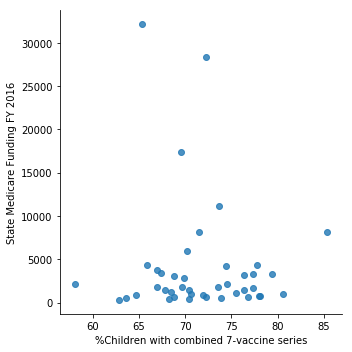

In [27]:
#Vaccination% against Medicaid Spending
import seaborn as sns
print(sns.lmplot(x='%Children with combined 7-vaccine series', y='State Medicare Funding FY 2016',data=df_to_visualize, fit_reg=False))

The graph above shows no trend between State Medicaid Funding and % children vaccinated. The following can be seen in the graph:(1)States with higher vaccination rates(>75%) have less than 10,000 Medicaid funding, (2) States with lower vaccination rates (<75%) have a mix of more than 10,000 and less than 10,000 in Medicaid funding, (3) States with higher Medicaid funding (>10,000) have lower vaccination rates (<75%) and (4) States with lower Medicaid funding (<10,000) have a mix of lower and higher vaccination rates.


Thus, we see that while there is an inverse trend indicated by 1 and 3, there is no trend across the entire graph/data. Therefore, we can conclude that State Medicaid Funding is not correlated with vaccination rates.


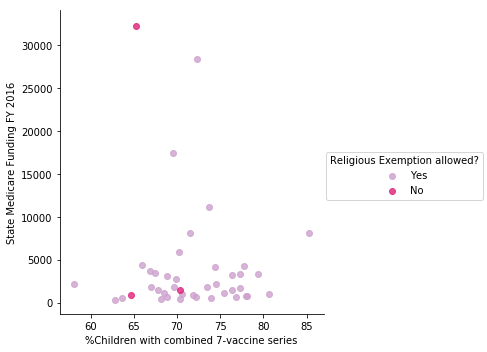

In [30]:
#Vaccination% against Medicaid Spending sorted by Religious Exemptions
print(sns.lmplot(x='%Children with combined 7-vaccine series', y='State Medicare Funding FY 2016',data=df_to_visualize, fit_reg=False, hue='Religious Exemption allowed?', palette="PuRd"))

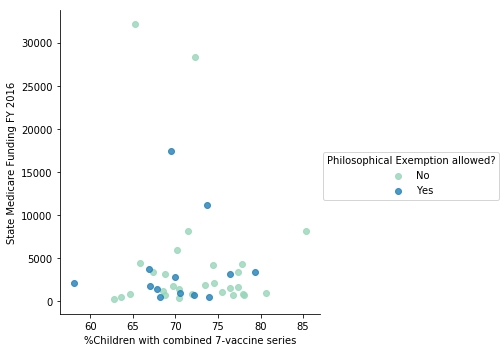

In [31]:
#Vaccination% against Medicaid Spending sorted by Philosophical Exemptions
print(sns.lmplot(x='%Children with combined 7-vaccine series', y='State Medicare Funding FY 2016',data=df_to_visualize, fit_reg=False, hue='Philosophical Exemption allowed?', palette="YlGnBu"))

Among the states with and without religious exemptions, there is once again a lack of trend between the State Medicaid Funding and % children vaccinated. The same applies to states with and without philosophical exemptions. Thus, segregating the data by exemptions reinforces the lack of trend between State Medicaid Funding and % children vaccinated.

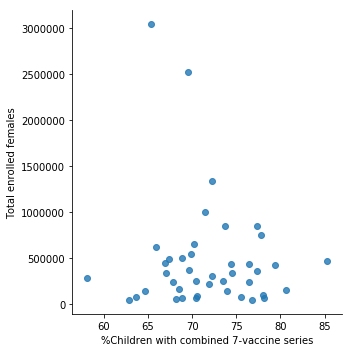

In [32]:
#Vaccination% against Total female population by Public School Enrollment
print(sns.lmplot(x='%Children with combined 7-vaccine series', y='Total enrolled females', data=df_to_visualize, fit_reg=False, palette="Greens"))

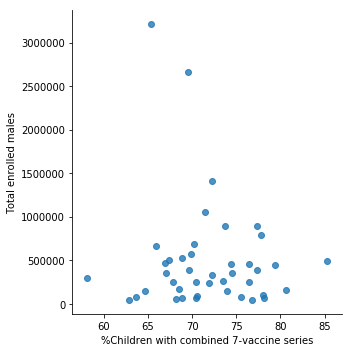

In [34]:
#Vaccination% against Total male population by Public School Enrollment
print(sns.lmplot(x='%Children with combined 7-vaccine series', y='Total enrolled males', data=df_to_visualize, fit_reg=False, palette="Oranges"))

The graphs above again show no linear trends when it comes to looking at the effect of total female and male educated population across states. 
1. California has the highest number of public school enrollment for both males and females but has lower vaccination rates as compared to other states.
2. States with lower public school enrollment have higher vaccination rates (For eg: Nebraska, etc.)
Thus, we can conclude that there are no trends when we try to correlate the vaccination data with the total public school enrollments in the United States. But our analysis could've been skewed because we took into consideration the absolute numbers of enrollments and not percentages. These absolute numbers will vary as different states have different areas Eg: California is much bigger than states like Rhode Island, Connecticut, etc. Density would've been a better measure but the information was not publicly available. 

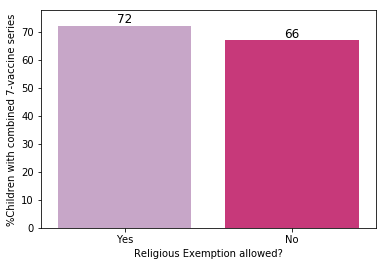

In [35]:
#Religious Exemptions plotted against avg%children vaccinated
ax_religious=sns.barplot(x='Religious Exemption allowed?', y='%Children with combined 7-vaccine series', data=df_to_visualize,palette="PuRd", errwidth=0)
for p in ax_religious.patches:
    ax_religious.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')


In the bar chart above, we observe that religious exemptions do not encourage lower vaccination rates (as opposed to intuition). The average %children vaccinated is higher for states that do allow for religious exemptions. This is probably due to the large difference in the number of states between the states with(n=39) and without(n=3) religious exemptions. 

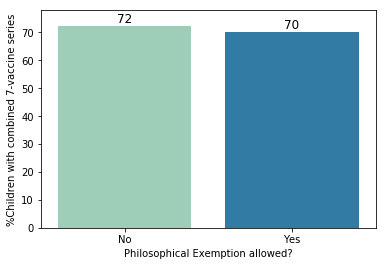

In [36]:
#Philosophical Exemptions plotted against avg%children vaccinated
ax_philosophical=sns.barplot(x='Philosophical Exemption allowed?', y='%Children with combined 7-vaccine series', data=df_to_visualize, palette="YlGnBu", errwidth=0)
for p in ax_philosophical.patches:
    ax_philosophical.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In the bar chart above, we see that the states with philosophical exemptions have a lower average %children vaccinated. In order to determine if the difference is statistically significant, we need to find out the p-value.

In [37]:
#finding p-value to see if the difference is statistically different
import scipy.stats as stats
df_with_phil_exemption= df_to_visualize[df_to_visualize['Philosophical Exemption allowed?'] == 'Yes']
sample_with_exemption=list(df_with_phil_exemption['%Children with combined 7-vaccine series'])
df_no_phil_exemption= df_to_visualize[df_to_visualize['Philosophical Exemption allowed?'] == 'No']
sample_no_exemption=list(df_no_phil_exemption['%Children with combined 7-vaccine series'])
t_val, p_val=stats.ttest_ind(sample_with_exemption, sample_no_exemption)
print ("p-value =","%.3f" % p_val)

p-value = 0.261


The p-value is 0.26 which is much greater than 0.05. This means that the difference between the two groups has more than a 5% probability of occurring by chance alone. Thus, the difference between the average %children vaccinated between states with and without philosophical exemptions is not significant. This tells us that allowing for philosophical exemptions does not influence the % children vaccinated. 

## 3.3 Statistical Analysis using Regression

Finally, to validate our Exploratory data analysis we ran a multiple regression with %immunization rates as the dependent variable and other continuous variables like Public school enrollment, and medicare funding as the independent variables. 

In [38]:
#Multiple regression to see the effect of total female and male population with public school enrollment on vaccination rates
import statsmodels.api as sm
df_reg = pd.DataFrame(df_to_visualize, columns=["Total enrolled females", "Total enrolled males", "State Medicare Funding FY 2016", "%Children with combined 7-vaccine series"])
X = df_reg[["Total enrolled females", "Total enrolled males", "State Medicare Funding FY 2016"]] #Input variables
target = pd.DataFrame(df_to_visualize, columns=["%Children with combined 7-vaccine series"])
X = sm.add_constant(X)
y = target["%Children with combined 7-vaccine series"]
model1 = sm.OLS(y,X).fit()
predictions = model1.predict(X)
model1.summary()

C:\Users\wildp\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     %Children with combined 7-vaccine series   R-squared:                       0.022
Model:                                                  OLS   Adj. R-squared:                 -0.055
Method:                                       Least Squares   F-statistic:                    0.2825
Date:                                      Sun, 06 May 2018   Prob (F-statistic):              0.838
Time:                                              15:22:50   Log-Likelihood:                -129.66
No. Observations:                                        42   AIC:                             267.3
Df Residuals:                                            38   BIC:                             274.3
Df Model:                                                 3                                         
Covariance Type:                                  nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             72.4035      1.178     61.452      0.000      70.018      74.789
Total enrolled females             0.0003      0.001      0.438      0.664      -0.001       0.001
Total enrolled males              -0.0002      0.001     -0.442      0.661      -0.001       0.001
State Medicare Funding FY 2016     0.0002      0.000      0.548      0.587      -0.000       0.001
==============================================================================
Omnibus:                        0.364   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.126
Skew:                          -0.134   Prob(JB):                        0.939
Kurtosis:                       3.001   Cond. No.                     1.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at our multiple regression results, we can reconfirm that there is no statistically significant correlation between any of the factors considered and the %immunization rates in the United States as the p-values for all the variables are >0.05.

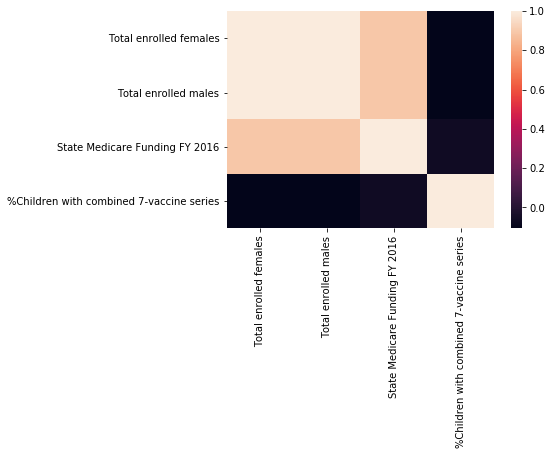

In [39]:
# calculate the correlation matrix
corr = df_reg.corr()
# plot the heatmap
sns.heatmap(corr,
        linecolor='black',
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Looking at the Correlation matrix, you can tell that there is no correlation between any of the continuous variables that we selected and %immunization. 

# 4. Project Summary

Immune Boosters Inc. evaluated the effect of various factor such as Education, Religious Exemption, Philosophical Exemption and Medicaid Spending on immunization rates across the United States. 
Based on our extensive analysis, we concluded that none of the factors impact immunization rates. 
Nonetheless, the project helped us develop a platform prototype which can be easily replicated using other social determinants factors like Ethnicity, Housing Occupancy, Poverty rates,etc. which might have a statistically significant effect on immunization rates. 
Thus, we would have to look at more factors to propose any concrete action items and policy changes regarding immunization.

# 5. Lessons Learned

__Reflection of group members__

Ayushi: I started off in the class with no experience in python and had taken an introductory course in SQL programming before. The first few course modules helped me get comfortable with python and after the first two weeks I started to enjoy coding in python. The class labs helped me with understanding the nuances of certain functions but it was the project that helped me code in a specific context to achieve a tangible goal. 
I remember sitting down in office hours and going over the interactive nature of one of my website data sources and how beautiful soup would be inadequate to extract data from the web page (https://www.aap.org/en-us/advocacy-and-policy/aap-health-initiatives/immunizations/Pages/Across-America.aspx). While the final excel is a clean and organized data that seems only “moderately complex”, obtaining the data took me a couple of weeks. The website uses a javascript at the back end and extracting information from there wasn’t really an option. That is when I decided to learn and use the selenium library to automate the process of clicking on a state, obtaining the source code, closing out of that pop up, clicking on the next state and so on. My selenium experience was both challenging and rewarding but it helped me understand the infinite possibilities within the world of data scraping. 
This course has helped me appreciate python, its advantages and its use in healthcare. As an aspiring healthcare data analyst, I am glad I took this course and chose vaccination as my project topic.

Aarti: This is my final semester and I have taken coursework in R and SAS prior to this. This class not only helped me get comfortable with python as a language but also helped me translate many concepts I've learned in other coding classes to this course. It was exciting to learn about the syntax difference between R and python. 
My coding language of preference has shifted from R to Python as it is much easier to work with bigger datasets using Python. Probably for pure data analytics, I will still prefer R over Python but when it comes to programming, Python is a much better tool as it lets you automate a lot of things. One of the biggest concept that I learnt over the course is web scraping and pulling data using API. Web scraping is so much more convenient using Python and I was introduced to many things I thought were impossible to do. Overall, I'm glad I took this course before I enter the world of Consulting. 